In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# The following code checks whether the source files numbered 1 to 9 are sufficiently different 

The source files can be found in this directory:
``C:\Users\ssamdani\Documents\data\temp\20181022循环数据10-2``

They have been copied to the low temp temp directory and then renamed to the i_{cell}.xls format 

``'C:\Users\ssamdani\OneDrive - Farasis Energy Inc\Documents\repos\parameter_optimization\data\lowtemp'``

on 16 core they have been copied to:
``'C:\Users\ssamdani\Documents\data\temp\low_temp_renamed``

In [24]:
dirc = r'C:\Users\ssamdani\Documents\data\temp\low_temp_renamed'

In [25]:
cells = ['172','500' ,'507','412']
dflist = []
i=2
for cell in cells:
    xl = pd.ExcelFile(dirc+f'/{i}_{cell}.xls')
    data_sheet = xl.sheet_names[-1]
    df = pd.read_excel(xl, sheet_name=data_sheet)
    dflist.append(df)


In [26]:
time_col = '系统记录时间'
temperature_list = []
for frame  in dflist:
    temp_cols = [cn  for cn in df.columns.values if '℃' in cn ]
    frame = frame[temp_cols + [time_col]]
    frame.columns = "temp1 temp2 temp3 temp4 time".split()
    temperature_list.append(
        frame
    )

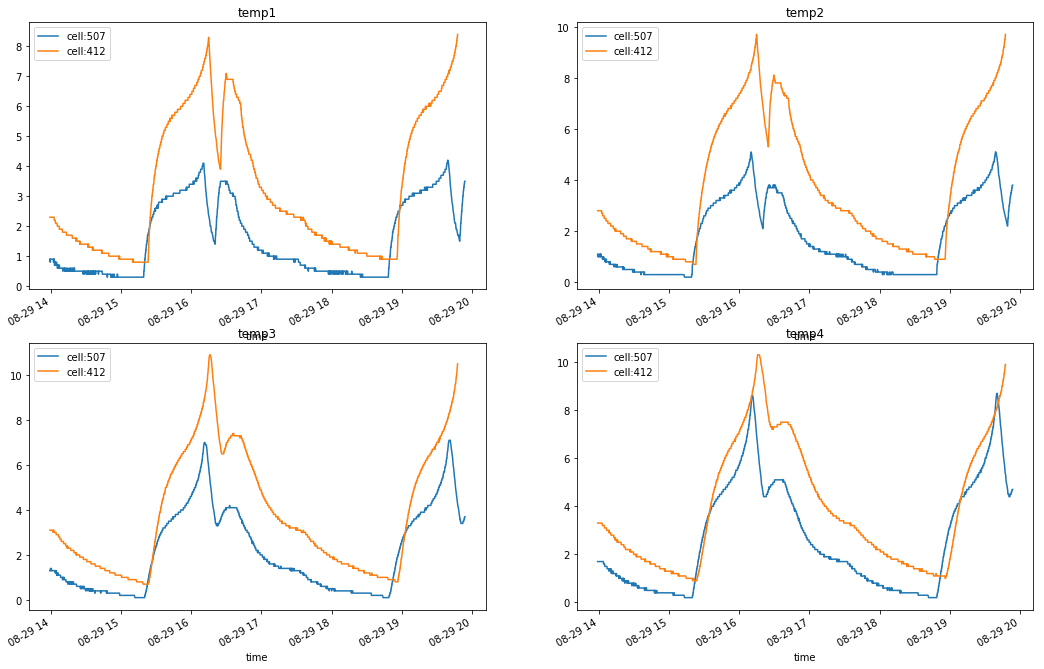

In [27]:
fig,ax_array = plt.subplots(2, 2, figsize=(18,12))
axes = ax_array.flatten()
        
for ti in range(1,5):
#     for i in [0,1]:
    for i in [2,3]:
        start = 1000
        dfcell = temperature_list[i].iloc[start:start+2000]
        dfcell.plot("time", f"temp{ti}", title=f"temp{ti}",ax = axes[ti-1], label=f"cell:{cells[i]}")

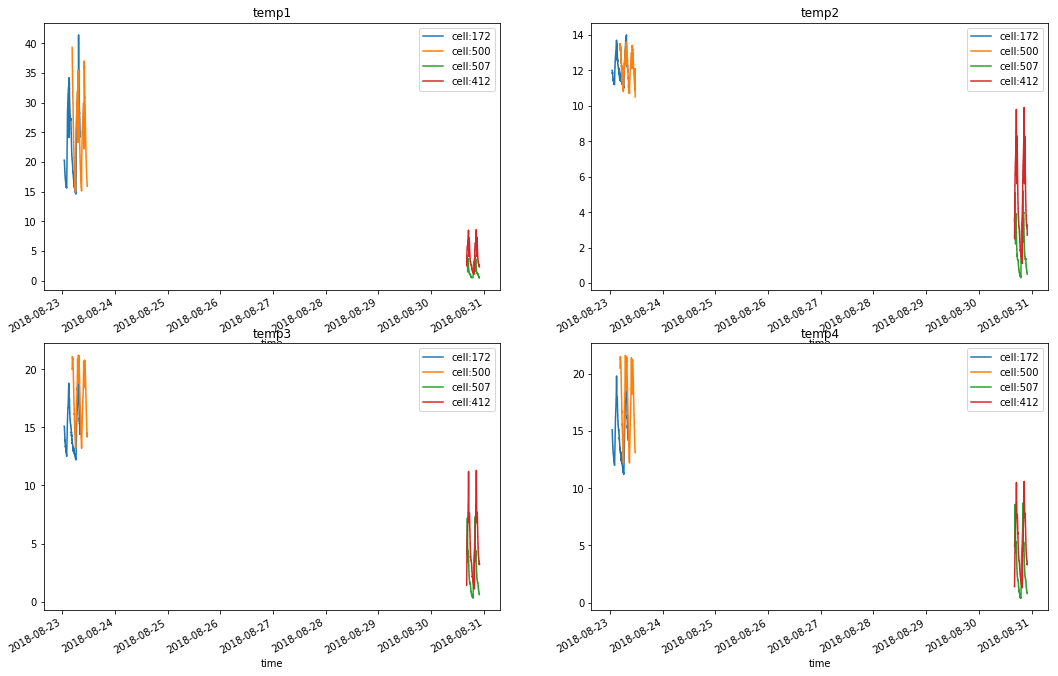

In [28]:
fig,ax_array = plt.subplots(2, 2, figsize=(18,12))
axes = ax_array.flatten()

# for i,dfcell in enumerate(temperature_list):
#     for ti in range(1,5):
#         dfcell.plot("time", f"temp{ti}", label=f"temp:{ti}",ax = axes[i], title=f"cell:{cells[i]}")
        
for ti in range(1,5):
#     for i,dfcell in enumerate(temperature_list):
    for i in [0,1,2,3]:
#     for i in [2,3]
        start = 10000
        dfcell = temperature_list[i].iloc[start:start+2000]
        dfcell.plot("time", f"temp{ti}", title=f"temp{ti}",ax = axes[ti-1], label=f"cell:{cells[i]}")

# Create concatenated files that can be used with matt's code 


The source files can be found in this directory:
``'C:\Users\ssamdani\temp\temp\20181022循环数据10-2\Temp 10 degrees'``
They have been copied to the low temp temp directory and then renamed to the i_{cell}.xls format 

``'C:\Users\ssamdani\OneDrive - Farasis Energy Inc\Documents\repos\parameter_optimization\data\lowtemp'``

on 16 core they have been copied to:
``'C:\Users\ssamdani\Documents\data\temp\low_temp_renamed``

In [30]:
cells = ['172','500' ,'507','412']
dflist = []
summary_list = [] #sumfile list
for cell in cells:
    no_files = len(glob.glob(dirc+f'/*{cell}.xls'))
    print(f"{cell} has {no_files} files")
    
    for i in range(1,no_files+1):
        xl = pd.ExcelFile(dirc+f'/{i}_{cell}.xls')
        data_sheet = xl.sheet_names[-1]
        df = pd.read_excel(xl, sheet_name=data_sheet)
        dflist.append(df)
        dfsummary = pd.read_excel(xl,sheet_name='通道循环数据')
        summary_list.append(dfsummary)

    bigframe = pd.concat(dflist, ignore_index=True,sort=True) 
    summary_frame = pd.concat(summary_list, ignore_index=True, sort=True)
    writer = pd.ExcelWriter(f'data_to_process/{cell}.xlsx')
    bigframe.to_excel(writer, sheet_name="_1")
    summary_frame.to_excel(writer, sheet_name="summary")
    writer.save()

NameError: name 'glob' is not defined

# verify that files are being created properly

In [ ]:
cells = ['172','500' ,'507','412']
dflist = []
for cell in cells:
    print(f'reading file: {cell}')
    xl = pd.ExcelFile(f'data_to_process/{cell}.xlsx')
    data_sheet = xl.sheet_names[0]
    df = pd.read_excel(xl, sheet_name=data_sheet,parse_dates=True)
    dflist.append(df)
   

In [26]:
time_col = '系统记录时间'
temperature_list = []
for frame  in dflist:
    temp_cols = [cn  for cn in df.columns.values if '℃' in cn ]
    frame = frame[temp_cols + [time_col]]
    frame.columns = "temp1 temp2 temp3 temp4 time".split()
    temperature_list.append(
        frame
    )

In [ ]:
fig,ax_array = plt.subplots(2, 2, figsize=(18,12))
axes = ax_array.flatten()
for ti in range(1,5):
#     for i in [0,1]:
    for i in [2,3]:
        start = 1000
        dfcell = temperature_list[i].iloc[start:start+2000]
        dfcell.plot("time", f"temp{ti}", title=f"temp{ti}",ax = axes[ti-1], label=f"cell:{cells[i]}")

In [ ]:
fig,ax_array = plt.subplots(2,2, figsize=(18,12))
axes = ax_array.flatten()

# for i,dfcell in enumerate(temperature_list):
#     for ti in range(1,5):
#         dfcell.plot("time", f"temp{ti}", label=f"temp:{ti}",ax = axes[i], title=f"cell:{cells[i]}")
        
for ti in range(1,5):
    for i,dfcell in enumerate(temperature_list):
        dfcell.plot("time", f"temp{ti}", title=f"temp{ti}",ax = axes[ti-1], label=f"cell:{cells[i]}")

# The following code is used to combine the various xls files from testing of each individual cell. 

This data format is for 0 and 10 degree tests and it is different than the format used for the 25 deg and 45 degree tests. The goal was to re-use previous code that converted mandarin file to an english file. Therefore the process is broken into multiple steps:

1. rename files in the 1_172.xls format from the factory format (this is done in bash) 
2. concatenate all files into a file
3. use the previous tool to convert it to csv and extra data

The source files can be found in this directory:
``'C:\Users\ssamdani\temp\temp\20181022循环数据10-2\Temp 10 degrees'``
They have been copied to the low temp temp directory and then renamed to the i_{cell}.xls format 

``'C:\Users\ssamdani\OneDrive - Farasis Energy Inc\Documents\repos\parameter_optimization\data\lowtemp'``

In [ ]:
from openpyxl import load_workbook
from matplotlib import pyplot as plt
from datetime import timedelta
from datetime import datetime
import scipy.integrate
import numpy

import fileset
import csvtool

In [ ]:
path = "./" 
dirs = ['data_to_process/']#, '20180715_45oC/'] #['test/'] #

In [ ]:
date_marker = '2018'
volt_marker = '(V)'
curr_marker = '(A)'
# temp_marker = 'C)'
temp_marker = '℃)'
stepcap_marker = '(Ah)'
stepnrg_marker = '(Wh)'
step_marker = '过程号'
cycle_marker = '循环号'

datetime_col, volt_col, curr_col, stepcap_col, stepnrg_col, temp_cols\
    = 0, 0, 0, 0, 0, []
# stepindex_col = 0
# cycleindex_col = 8

dat = [[] for dr in dirs]
hdr = [[] for dr in dirs]
datdict = [[] for dr in dirs]
dict_header = ['Time [s]', 'Time [hr]', 'Step Index', 'Cycle Index',
               'Voltage [V]', 'Current [A]', 'Power [W]', 'Step Capacity [Ah]',
               'Step Energy [mWh]', 'Charge Throughput [Ah]',
               'Abs Charge Throughput [Ah]', 'Abs Energy Throughput [Wh]',
               'T1 [oC]', 'T2 [oC]', 'T3 [oC]', 'T4 [oC]']
dict_header_noTemp = [dh for dh in dict_header if 'oC' not in dh]

temp_dat_on = True

for idr, dr in enumerate(dirs):
    fnames = fileset.get_files_suffLim(path + dr, '.xlsx')
    dat[idr] = [[] for fni in fnames]
    datdict[idr] = [[] for fni in fnames]
    hdr[idr] = [[] for fni in fnames]
    print('Present directory:', path + dr)

    for ifn, fn in enumerate(fnames):
        tstart = datetime.now()
        print('\tStarting file:', ifn+1, '/', len(fnames))
        print('\t\tFilename:', fn)
        got_extra_dat = False

        book = load_workbook(path + dr + fn)

        sheet_names = book.get_sheet_names()
        sheets = [shn for shn in sheet_names if '_' in shn]

        dat[idr][ifn] = []
        datdict = dict([(dh, []) for dh in dict_header])
        timestamp_values = []
        datetime_values = []
        voltage_values = []
        current_values = []
        stepcap_values = []
        stepnrg_values = []
        T1_values = []
        T2_values = []
        T3_values = []
        T4_values = []
        stepindex_values = []
        cycleindex_values = []

        isheet = 0
#        ishn = 0
        for sheet in book.worksheets:
            shn = sheet.title
            if '_' in shn or isheet == 0:
                rows = sheet.rows

                values = []
                irow = 0
                for row in rows:
                    v = [] # hold the values for this row
                    icell = 0
                    for cell in row:
                        v.append(cell.value) # get all of the values for this row
                        icell += 1

                    # save the header
                    if irow == 0:
                        hdr[idr][ifn] = v #[vi.encode('utf-8') for vi in v]

                        # find the column where voltage and current data is stored
                        for ic, vi in enumerate(v):
                            if vi is not None:
                                if volt_marker in vi:
                                    volt_col = ic
                                if curr_marker in vi:
                                    curr_col = ic
                                if stepcap_marker in vi:
                                    stepcap_col = ic
                                if stepnrg_marker in vi:
                                    stepnrg_col = ic
                                if temp_marker in vi:
                                    temp_cols.append(ic)
                                if step_marker in vi:
                                    stepindex_col  = ic
                                if cycle_marker in vi:
                                    cycleindex_col  = ic
                    # store the data
                    else:
                        if irow == 1:  # find the timestamp string column
                            v_str = [str(vi) for vi in v]
                            for ic, vsi in enumerate(v_str):
                                if date_marker in vsi:
                                    datetime_col = ic
                                    print(f"found date time column")
                                else:
                                    datetime_col = 18

                        # tack on the data to the values array
                        values.append(v)

#                         dt_now = datetime.strptime(v[datetime_col], '%Y-%m-%d %I:%M:%S %p')
                        dt_now = v[datetime_col]

                        if irow > 2:
                            # check for dt jump
                            delta_t_sec = (dt_now - datetime_values[-1]).total_seconds()
                            if (stepindex_values[-1] == stepindex_values[-2])\
                                    and delta_t_sec > 40.:

#                                 print('')
#                                 print('irow:', irow, 'delta_t_sec:', delta_t_sec)
#                                 print('')
#                                plt.figure(1)
#                                plt.show()

                                # Insert the mid values for datetime
                                datetime_values.append(datetime_values[-1]
                                                       + timedelta(seconds=0.01))
                                datetime_values.append(dt_now
                                                       - timedelta(seconds=0.01))
                                # Insert the mid values for voltage
                                voltage_values.append(voltage_values[-1])
                                voltage_values.append(v[volt_col])
                                # Insert the mid values for current
                                current_values.append(0.0)
                                current_values.append(0.0)
                                # Insert the mid values for step_index
                                stepindex_values.append(stepindex_values[-1])
                                stepindex_values.append(v[stepindex_col])
                                # Insert the mid values for cycle_index
                                cycleindex_values.append(cycleindex_values[-1])
                                cycleindex_values.append(v[cycleindex_col])
                                # Insert the mid values for stepcap
                                stepcap_values.append(stepcap_values[-1])
                                stepcap_values.append(v[stepcap_col])
                                # Insert the mid values for stepnrg
                                stepnrg_values.append(stepnrg_values[-1])
                                stepnrg_values.append(v[stepnrg_col])

                                if temp_dat_on:
                                    T1_values.append(T1_values[-1])
                                    T2_values.append(T2_values[-1])
                                    T3_values.append(T3_values[-1])
                                    T4_values.append(T4_values[-1])

                                    T1_values.append(v[temp_cols[0]])
                                    T2_values.append(v[temp_cols[1]])
                                    T3_values.append(v[temp_cols[2]])
                                    T4_values.append(v[temp_cols[3]])

                        # Update data holders for each important variable
                        datetime_values.append(dt_now)
                        voltage_values.append(v[volt_col])
                        current_values.append(v[curr_col])
                        stepindex_values.append(v[stepindex_col])
                        cycleindex_values.append(v[cycleindex_col])
                        stepcap_values.append(v[stepcap_col])
                        stepnrg_values.append(v[stepnrg_col])

                        # Check for temperature data existing
                        if temp_dat_on:
                            if not temp_cols:
                                print('\t\tTemp data not in this file.')
                                temp_dat_on = False

                                datdict = dict([(dh, [])
                                                for dh in dict_header_noTemp])
                                dict_header = dict_header_noTemp
                            else:
                                T1_values.append(v[temp_cols[0]])
                                T2_values.append(v[temp_cols[1]])
                                T3_values.append(v[temp_cols[2]])
                                T4_values.append(v[temp_cols[3]])
                    irow += 1

            elif '_' not in shn and isheet == 1 and not got_extra_dat:
                rows = sheet.rows

                print('isheet:', isheet, ' | Getting extra data.')

                cyccol_ex, ccapcol_ex, dcapcol_ex, cnrgcol_ex, dnrgcol_ex \
                    = 4, 5, 6, 7, 8
                col_names = ['Cycle Index', 'Charge Capacity [Ah]',
                             'Charge Energy [Wh]', 'Discharge Capacity [Ah]',
                             'Discharge Energy [Wh]']
                cycleindex_values_ex = []
                chgcap_values_ex = []
                dchgcap_values_ex = []
                chgnrg_values_ex = []
                dchgnrg_values_ex = []

                extra_dict = dict([(cn, []) for cn in col_names])
#                values_extra = []
                irow = 0
                for row in rows:
                    v = [] # hold the values for this row
                    icell = 0
                    for cell in row:
                        v.append(cell.value) # get all of the values for this row
                        icell += 1

                    if irow > 0:
                        # tack on the data to the values array
#                        values_extra.append(v)
                        cycleindex_values_ex.append(v[cyccol_ex])
                        chgcap_values_ex.append(v[ccapcol_ex])
                        dchgcap_values_ex.append(v[dcapcol_ex])
                        chgnrg_values_ex.append(v[cnrgcol_ex])
                        dchgnrg_values_ex.append(v[dnrgcol_ex])

                    irow += 1

                extra_dict[col_names[0]] = cycleindex_values_ex
                extra_dict[col_names[1]] = chgcap_values_ex
                extra_dict[col_names[2]] = dchgcap_values_ex
                extra_dict[col_names[3]] = chgnrg_values_ex
                extra_dict[col_names[4]] = dchgnrg_values_ex
                csvtool.dicttocsv(col_names, extra_dict,
                          path + dr + fn[:-5] + '__extradata' + '.csv')

                got_extra_dat = True

#                ishn += 1
            isheet += 1

        time_sec = [(dti - datetime_values[0]).total_seconds()
                    for dti in datetime_values]
        time_hour = [ts/3600.0 for ts in time_sec]

        power_values = [vi*ci for vi, ci in zip(voltage_values, current_values)]

        accum_charge = scipy.integrate.cumtrapz(numpy.absolute(current_values),
                                                x=time_hour, initial=0.0)

        integ_charge = scipy.integrate.cumtrapz(current_values,
                                                x=time_hour, initial=0.0)

        accum_energy = scipy.integrate.cumtrapz(numpy.absolute(power_values),
                                                x=time_hour, initial=0.0)

        datdict['Time [s]'] = time_sec
        datdict['Time [hr]'] = time_hour
        datdict['Voltage [V]'] = voltage_values
        datdict['Current [A]'] = current_values
        datdict['Power [W]'] = power_values
        datdict['Step Index'] = stepindex_values
        datdict['Cycle Index'] = cycleindex_values
        datdict['Step Capacity [Ah]'] = stepcap_values
        datdict['Step Energy [mWh]'] = stepnrg_values
        datdict['Charge Throughput [Ah]'] = integ_charge
        datdict['Abs Charge Throughput [Ah]'] = accum_charge
        datdict['Abs Energy Throughput [Wh]'] = accum_energy

        if temp_dat_on:
            datdict['T1 [oC]'] = T1_values
            datdict['T2 [oC]'] = T2_values
            datdict['T3 [oC]'] = T3_values
            datdict['T4 [oC]'] = T4_values

        csvtool.dicttocsv(dict_header, datdict, path + dr + fn[:-5] + '.csv')

        tfinish = datetime.now()
        proctime = (tfinish - tstart).total_seconds()
        print('\t\tProcessing time:', str(round(proctime, 3)) + ' seconds.\n')

In [ ]:
for k,v in datdict.items():
    print(f"{k} is of length {len(v)}")

In [ ]:
tdf = pd.DataFrame(datdict)